# Isolation Forest For WebLog

In [98]:
import pandas as pd
import numpy as np

In [99]:
df = pd.read_csv("web_logs.csv")

In [100]:
df.head()

,timestamp,ip_address,user_agent,status_code,request_method,url,response_time,log_level
0,2025-02-13 06:58:04.072836,75.104.45.87,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7),401,DELETE,/admin,1522.63,INFO
1,2025-02-13 07:07:26.072836,168.5.11.122,Mozilla/5.0 (Windows NT 10.0; Win64; x64),403,GET,/admin,302.51,INFO
2,2025-02-13 07:09:44.072836,112.166.232.25,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7),502,POST,/login,1871.98,INFO
3,2025-02-13 07:10:13.072836,220.145.129.191,Mozilla/5.0 (Linux; Android 11),200,POST,/home,2746.75,INFO
4,2025-02-13 07:19:48.072836,41.150.116.145,Mozilla/5.0 (Windows NT 10.0; Win64; x64),201,DELETE,/search?q=test,1491.42,INFO


In [101]:
# df = df.drop(['ident','user'],axis = 1)

# df.head()

In [102]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [103]:
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) / 10**9  # Convert to seconds

label_encoders = {}
categorical_features = ['ip_address', 'user_agent', 'request_method', 'url', 'log_level']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,timestamp,ip_address,user_agent,status_code,request_method,url,response_time,log_level
0,1.739430e+09,13440,1,401,0,0,1522.63,2
1,1.739430e+09,4605,2,403,1,0,302.51,2
2,1.739431e+09,1005,1,502,2,4,1871.98,2
3,1.739431e+09,7947,0,200,2,3,2746.75,2
4,1.739431e+09,11332,2,201,0,7,1491.42,2


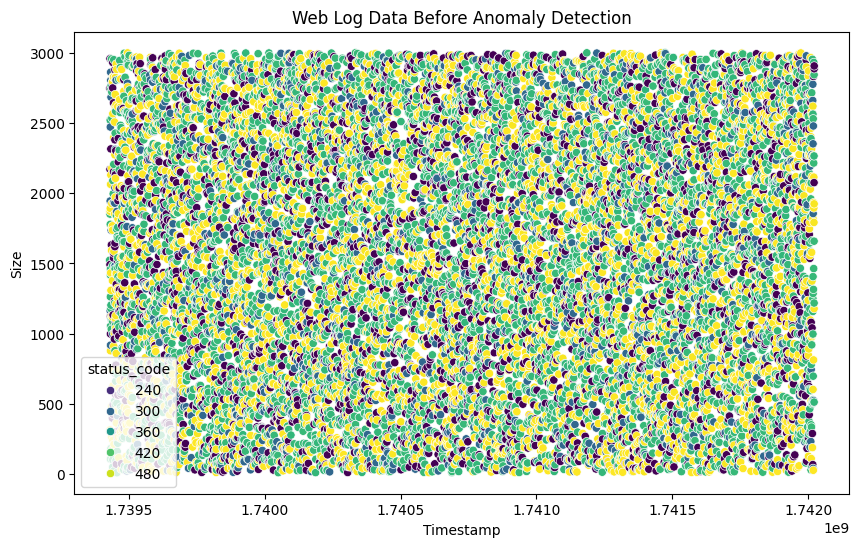

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['timestamp'], y=df['response_time'], hue=df['status_code'], palette='viridis')
plt.title("Web Log Data Before Anomaly Detection")
plt.xlabel("Timestamp")
plt.ylabel("Size")
plt.show()

In [105]:
features = ['ip_address', 'user_agent', 'request_method', 'url', 'log_level', 'response_time', 'status_code']
X = df[features]
#,n_estimators=200,max_samples='auto',
iso_forest = IsolationForest(contamination=0.10, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)

df['anomaly'] = df['anomaly'].map({-1: 'Anomalous', 1: 'Normal'})

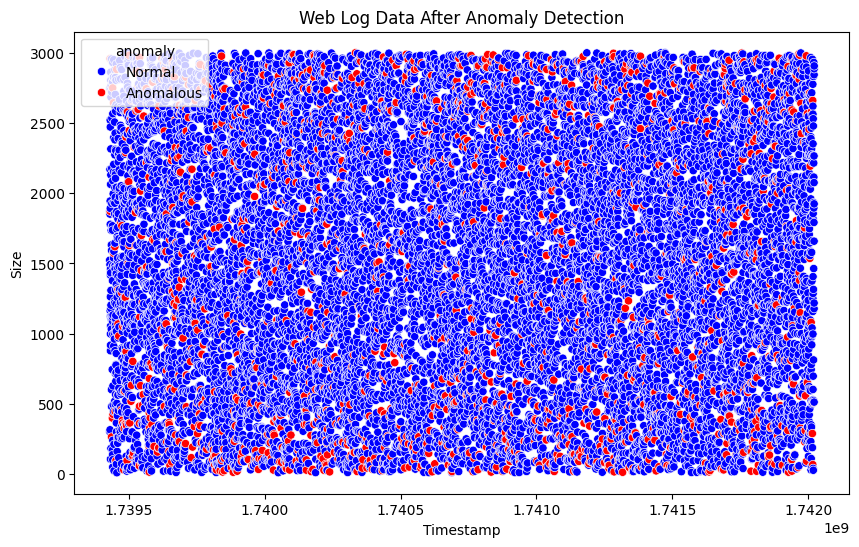

          timestamp  ip_address  user_agent  status_code  request_method  url  \
7      1.739431e+09        4508           3          200               0    0   
12     1.739432e+09        3605           1          500               0    6   
45     1.739437e+09        5661           1          503               0    8   
56     1.739440e+09        6421           4          201               0    2   
65     1.739441e+09       11105           2          200               3    1   
...             ...         ...         ...          ...             ...  ...   
14934  1.742011e+09       14812           0          500               0    6   
14951  1.742015e+09        1113           3          200               1    3   
14956  1.742016e+09       12458           0          301               0    2   
14957  1.742016e+09        7355           0          200               2    2   
14988  1.742020e+09        7976           4          301               2    2   

       response_time  log_l

In [106]:
# Visualization after applying Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['timestamp'], y=df['response_time'], hue=df['anomaly'], palette={'Anomalous': 'red', 'Normal': 'blue'})
plt.title("Web Log Data After Anomaly Detection")
plt.xlabel("Timestamp")
plt.ylabel("Size")
plt.show()

# Display anomalies
anomalies = df[df['anomaly'] == 'Anomalous']
print(anomalies)

In [107]:
df.head()

,timestamp,ip_address,user_agent,status_code,request_method,url,response_time,log_level,anomaly
0,1.739430e+09,13440,1,401,0,0,1522.63,2,Normal
1,1.739430e+09,4605,2,403,1,0,302.51,2,Normal
2,1.739431e+09,1005,1,502,2,4,1871.98,2,Normal
3,1.739431e+09,7947,0,200,2,3,2746.75,2,Normal
4,1.739431e+09,11332,2,201,0,7,1491.42,2,Normal


In [108]:
original_index = df[(df['timestamp'] == 1.739431e+09) &
                    (df['ip_address'] == 4508) &
                    (df['user_agent'] == 3) &
                    (df['status_code'] == 200) &
                    (df['request_method'] == 0) &
                    (df['log_level'] == 0)].index

print("Original Index:", original_index.tolist())


original_ip = label_encoders['ip_address'].inverse_transform([4508])
original_ua = label_encoders['user_agent'].inverse_transform([3])

print("Original IP:", original_ip[0])
print("Original User-Agent:", original_ua[0])



Original Index: []
Original IP: 166.99.10.37
Original User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64)


In [109]:
print("Anomalous Indexes:", anomalies.index.tolist())

Anomalous Indexes: [7, 12, 45, 56, 65, 76, 81, 87, 104, 113, 142, 157, 176, 181, 183, 197, 230, 243, 251, 252, 266, 269, 278, 288, 306, 313, 318, 328, 329, 331, 337, 342, 348, 349, 356, 373, 388, 401, 415, 419, 420, 421, 431, 452, 454, 459, 466, 490, 501, 502, 511, 524, 532, 544, 548, 552, 554, 564, 570, 585, 594, 595, 601, 610, 620, 621, 622, 626, 628, 648, 650, 661, 664, 667, 676, 679, 682, 694, 697, 703, 715, 744, 747, 756, 757, 761, 808, 810, 813, 814, 815, 825, 837, 855, 873, 891, 893, 894, 922, 925, 973, 1001, 1024, 1028, 1075, 1081, 1082, 1099, 1118, 1128, 1131, 1150, 1158, 1166, 1168, 1171, 1176, 1181, 1187, 1201, 1209, 1221, 1231, 1233, 1240, 1250, 1255, 1257, 1262, 1276, 1288, 1289, 1302, 1315, 1317, 1319, 1324, 1326, 1327, 1332, 1335, 1351, 1354, 1361, 1364, 1366, 1377, 1378, 1382, 1385, 1392, 1407, 1432, 1438, 1441, 1453, 1459, 1460, 1463, 1476, 1480, 1486, 1491, 1507, 1508, 1519, 1538, 1542, 1550, 1586, 1590, 1591, 1598, 1603, 1604, 1613, 1641, 1642, 1654, 1685, 1697, 1706

In [110]:
df['anomaly_score'] = iso_forest.decision_function(X)

In [111]:
df.head()

,timestamp,ip_address,user_agent,status_code,request_method,url,response_time,log_level,anomaly,anomaly_score
0,1.739430e+09,13440,1,401,0,0,1522.63,2,Normal,0.061029
1,1.739430e+09,4605,2,403,1,0,302.51,2,Normal,0.082513
2,1.739431e+09,1005,1,502,2,4,1871.98,2,Normal,0.086701
3,1.739431e+09,7947,0,200,2,3,2746.75,2,Normal,0.053945
4,1.739431e+09,11332,2,201,0,7,1491.42,2,Normal,0.061522


In [112]:
df['anomaly'].value_counts()

,count
anomaly,
Normal,13500
Anomalous,1500


In [114]:
df['anomaly'] = df['anomaly'].map({'Normal': 0, 'Anomalous': 1})

In [115]:
df.describe()

,timestamp,ip_address,user_agent,status_code,request_method,url,response_time,log_level,anomaly,anomaly_score
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000
mean,1.740730e+09,7499.500000,2.001467,382.749733,1.509467,3.971600,1507.573743,1.949400,0.10000,0.050559
std,7.458955e+05,4330.271354,1.417462,107.635320,1.120592,2.574419,864.244015,0.676119,0.30001,0.037378
min,1.739430e+09,0.000000,0.000000,200.000000,0.000000,0.000000,10.090000,0.000000,0.00000,-0.083378
25%,1.740087e+09,3749.750000,1.000000,301.000000,1.000000,2.000000,757.195000,2.000000,0.00000,0.025306
50%,1.740729e+09,7499.500000,2.000000,403.000000,2.000000,4.000000,1505.550000,2.000000,0.00000,0.052937
75%,1.741375e+09,11249.250000,3.000000,500.000000,3.000000,6.000000,2263.890000,2.000000,0.00000,0.077722
max,1.742022e+09,14999.000000,4.000000,503.000000,3.000000,8.000000,2999.900000,3.000000,1.00000,0.146477


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X = df[['ip_address', 'user_agent', 'request_method', 'url', 'log_level', 'response_time', 'status_code']]  # Fix: Select actual data, not column names
y = df['anomaly']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2721
           1       0.80      0.63      0.70       279

    accuracy                           0.95      3000
   macro avg       0.88      0.81      0.84      3000
weighted avg       0.95      0.95      0.95      3000



# Isolation Forest For AccessLog

In [118]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


df1 = pd.read_csv("accesslog.csv")
df1.head()

,ip,ident,user,timestamp,request,status,size
0,1.202.218.8,-,-,2012-06-20T19:05:12+02:00,GET /robots.txt HTTP/1.0,404,492
1,208.115.113.91,-,-,2012-06-20T19:20:16+02:00,GET /logs/?C=M;O=D HTTP/1.1,200,1278
2,123.125.71.20,-,-,2012-06-20T19:30:40+02:00,GET / HTTP/1.1,200,912
3,220.181.108.101,-,-,2012-06-20T19:31:01+02:00,GET / HTTP/1.1,200,912
4,123.125.68.79,-,-,2012-06-20T19:53:24+02:00,GET / HTTP/1.1,200,625


In [119]:
df1 = df1.drop(['ident','user'], axis = 1)
df1.head()

,ip,timestamp,request,status,size
0,1.202.218.8,2012-06-20T19:05:12+02:00,GET /robots.txt HTTP/1.0,404,492
1,208.115.113.91,2012-06-20T19:20:16+02:00,GET /logs/?C=M;O=D HTTP/1.1,200,1278
2,123.125.71.20,2012-06-20T19:30:40+02:00,GET / HTTP/1.1,200,912
3,220.181.108.101,2012-06-20T19:31:01+02:00,GET / HTTP/1.1,200,912
4,123.125.68.79,2012-06-20T19:53:24+02:00,GET / HTTP/1.1,200,625


In [120]:
df1['timestamp'] = pd.to_datetime(df1['timestamp']).astype(int) / 10**9

label_encoders = {}
categorical_features = ['ip', 'timestamp', 'request']

for col in categorical_features:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

features = ['ip', 'timestamp', 'request', 'status', 'size']
X = df1[features]
#,n_estimators=200,max_samples='auto',
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df1['anomaly'] = iso_forest.fit_predict(X)

df1['anomaly'] = df1['anomaly'].map({-1: 'Anomalous', 1: 'Normal'})

print("Anomalous Indexes:", anomalies.index.tolist())

df1['anomaly'].value_counts()

Anomalous Indexes: [7, 12, 45, 56, 65, 76, 81, 87, 104, 113, 142, 157, 176, 181, 183, 197, 230, 243, 251, 252, 266, 269, 278, 288, 306, 313, 318, 328, 329, 331, 337, 342, 348, 349, 356, 373, 388, 401, 415, 419, 420, 421, 431, 452, 454, 459, 466, 490, 501, 502, 511, 524, 532, 544, 548, 552, 554, 564, 570, 585, 594, 595, 601, 610, 620, 621, 622, 626, 628, 648, 650, 661, 664, 667, 676, 679, 682, 694, 697, 703, 715, 744, 747, 756, 757, 761, 808, 810, 813, 814, 815, 825, 837, 855, 873, 891, 893, 894, 922, 925, 973, 1001, 1024, 1028, 1075, 1081, 1082, 1099, 1118, 1128, 1131, 1150, 1158, 1166, 1168, 1171, 1176, 1181, 1187, 1201, 1209, 1221, 1231, 1233, 1240, 1250, 1255, 1257, 1262, 1276, 1288, 1289, 1302, 1315, 1317, 1319, 1324, 1326, 1327, 1332, 1335, 1351, 1354, 1361, 1364, 1366, 1377, 1378, 1382, 1385, 1392, 1407, 1432, 1438, 1441, 1453, 1459, 1460, 1463, 1476, 1480, 1486, 1491, 1507, 1508, 1519, 1538, 1542, 1550, 1586, 1590, 1591, 1598, 1603, 1604, 1613, 1641, 1642, 1654, 1685, 1697, 1706

,count
anomaly,
Normal,1999
Anomalous,106


In [121]:
df1.head()

,ip,timestamp,request,status,size,anomaly
0,0,0,110,404,492,Normal
1,265,1,84,200,1278,Normal
2,59,2,1,200,912,Normal
3,297,3,1,200,912,Normal
4,42,4,1,200,625,Normal


In [122]:
df1['anomaly'] = df1['anomaly'].map({'Normal': 0, 'Anomalous': 1})

In [123]:
df1.describe()

,ip,timestamp,request,status,size,anomaly
count,2105.000000,2105.000000,2105.00000,2105.000000,2105.000000,2105.000000
mean,252.222803,894.718290,51.83753,268.032304,12910.516390,0.050356
std,147.258026,526.542159,47.33099,96.046492,49633.603513,0.218731
min,0.000000,0.000000,0.00000,200.000000,187.000000,0.000000
25%,129.000000,439.000000,1.00000,200.000000,502.000000,0.000000
50%,265.000000,896.000000,39.00000,200.000000,661.000000,0.000000
75%,385.000000,1346.000000,110.00000,404.000000,912.000000,0.000000
max,447.000000,1827.000000,120.00000,404.000000,336934.000000,1.000000


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X = df1[['ip', 'timestamp', 'request', 'status', 'size']]  # Fix: Select actual data, not column names
 # Convert labels to binary
y = df1['anomaly']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      0.87      0.93        15

    accuracy                           1.00       421
   macro avg       1.00      0.93      0.96       421
weighted avg       1.00      1.00      1.00       421



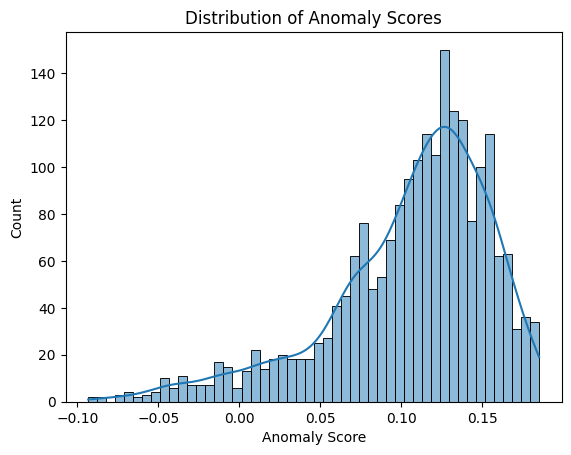

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

df1['anomaly_score'] = iso_forest.decision_function(X)

# Plot distribution
sns.histplot(df1['anomaly_score'], bins=50, kde=True)
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [96]:
df1.describe()

,ip,timestamp,request,status,size,anomaly,anomaly_score
count,2105.000000,2105.000000,2105.00000,2105.000000,2105.000000,0.0,2105.000000
mean,252.222803,894.718290,51.83753,268.032304,12910.516390,NaN,0.105646
std,147.258026,526.542159,47.33099,96.046492,49633.603513,NaN,0.050285
min,0.000000,0.000000,0.00000,200.000000,187.000000,NaN,-0.093321
25%,129.000000,439.000000,1.00000,200.000000,502.000000,NaN,0.079780
50%,265.000000,896.000000,39.00000,200.000000,661.000000,NaN,0.116249
75%,385.000000,1346.000000,110.00000,404.000000,912.000000,NaN,0.140031
max,447.000000,1827.000000,120.00000,404.000000,336934.000000,NaN,0.185087


,ip,timestamp,request,status,size,anomaly,anomaly_score
count,2105.000000,2105.000000,2105.00000,2105.000000,2105.000000,0.0,2105.000000
mean,252.222803,894.718290,51.83753,268.032304,12910.516390,NaN,0.105646
std,147.258026,526.542159,47.33099,96.046492,49633.603513,NaN,0.050285
min,0.000000,0.000000,0.00000,200.000000,187.000000,NaN,-0.093321
25%,129.000000,439.000000,1.00000,200.000000,502.000000,NaN,0.079780
50%,265.000000,896.000000,39.00000,200.000000,661.000000,NaN,0.116249
75%,385.000000,1346.000000,110.00000,404.000000,912.000000,NaN,0.140031
max,447.000000,1827.000000,120.00000,404.000000,336934.000000,NaN,0.185087


# Isolation Forest For WindowLog

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


df2 = pd.read_csv("Windows_2k.log_structured.csv")
df2.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate
0,1,2016-09-28,04:30:30,Info,CBS,Loaded Servicing Stack v6.1.7601.23505 with Co...,E23,Loaded Servicing Stack <*> with Core: <*>\cbsc...
1,2,2016-09-28,04:30:31,Info,CSI,00000001@2016/9/27:20:30:31.455 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...
2,3,2016-09-28,04:30:31,Info,CSI,00000002@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...
3,4,2016-09-28,04:30:31,Info,CSI,00000003@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...
4,5,2016-09-28,04:30:31,Info,CBS,Ending TrustedInstaller initialization.,E17,Ending TrustedInstaller initialization.


In [24]:
df2['Date'] = pd.to_datetime(df2['Date'])

df2['DateTime'] = pd.to_datetime(df2['Date'].astype(str) + ' ' + df2['Time'].astype(str))

df2['timestamp'] = df2['DateTime'].astype('int64') // 10**9

In [25]:
df2.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,DateTime,timestamp
0,1,2016-09-28,04:30:30,Info,CBS,Loaded Servicing Stack v6.1.7601.23505 with Co...,E23,Loaded Servicing Stack <*> with Core: <*>\cbsc...,2016-09-28 04:30:30,1475037030
1,2,2016-09-28,04:30:31,Info,CSI,00000001@2016/9/27:20:30:31.455 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,2016-09-28 04:30:31,1475037031
2,3,2016-09-28,04:30:31,Info,CSI,00000002@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,2016-09-28 04:30:31,1475037031
3,4,2016-09-28,04:30:31,Info,CSI,00000003@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,2016-09-28 04:30:31,1475037031
4,5,2016-09-28,04:30:31,Info,CBS,Ending TrustedInstaller initialization.,E17,Ending TrustedInstaller initialization.,2016-09-28 04:30:31,1475037031


In [26]:
df2 = df2.drop(['LineId','Date','Time','DateTime'], axis = 1)

In [27]:
df2.head()

,Level,Component,Content,EventId,EventTemplate,timestamp
0,Info,CBS,Loaded Servicing Stack v6.1.7601.23505 with Co...,E23,Loaded Servicing Stack <*> with Core: <*>\cbsc...,1475037030
1,Info,CSI,00000001@2016/9/27:20:30:31.455 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,1475037031
2,Info,CSI,00000002@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,1475037031
3,Info,CSI,00000003@2016/9/27:20:30:31.458 WcpInitialize ...,E13,<*>@<*>/<*>/<*>:<*>:<*>:<*>.<*> WcpInitialize ...,1475037031
4,Info,CBS,Ending TrustedInstaller initialization.,E17,Ending TrustedInstaller initialization.,1475037031


In [28]:
label_encoders = {}
categorical_features = ['Level','Component','Content','EventId','EventTemplate']

for col in categorical_features:
  le = LabelEncoder()
  df2[col] = le.fit_transform(df2[col])
  label_encoders[col] = le

In [29]:
df2.head()

,Level,Component,Content,EventId,EventTemplate,timestamp
0,0,0,35,15,22,1475037030
1,0,1,0,4,12,1475037031
2,0,1,2,4,12,1475037031
3,0,1,4,4,12,1475037031
4,0,0,28,8,15,1475037031


In [31]:
features = ['Level','Component','Content','EventId','EventTemplate','timestamp']
X = df2[features]

iso_forest = IsolationForest(contamination = 0.05, random_state = 42)
df2['anomaly'] = iso_forest.fit_predict(X)


In [32]:
df2.head()

,Level,Component,Content,EventId,EventTemplate,timestamp,anomaly
0,0,0,35,15,22,1475037030,1
1,0,1,0,4,12,1475037031,-1
2,0,1,2,4,12,1475037031,-1
3,0,1,4,4,12,1475037031,-1
4,0,0,28,8,15,1475037031,1


In [35]:
df2['anomaly'].value_counts()

,count
anomaly,
1,1920
-1,80


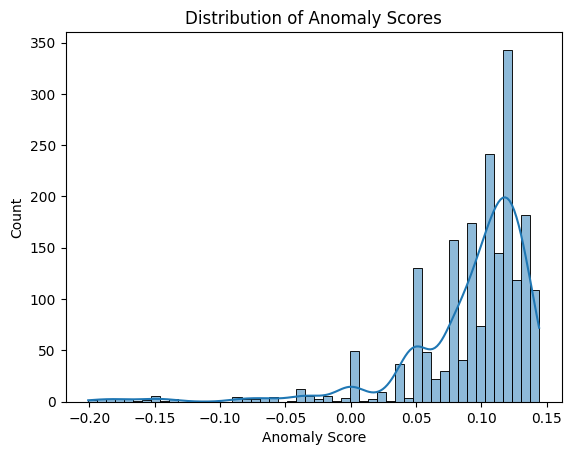

In [37]:
df2['anomaly_score'] = iso_forest.decision_function(X)

# Plot distribution
sns.histplot(df2['anomaly_score'], bins=50, kde=True)
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df2[['Level','Component','Content','EventId','EventTemplate','timestamp']]
y = df2['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.75      0.86        12
           1       0.99      1.00      1.00       388

    accuracy                           0.99       400
   macro avg       1.00      0.88      0.93       400
weighted avg       0.99      0.99      0.99       400

